In [ ]:
### Executar para utilização do MatPlotLib e Seaborn
# !pip install matplotlib
# !pip install seaborn

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", index_col=0)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


### REALIZE ANÁLISES EXPLORATÓRIAS NOS DADOS E RESPONDA AS SEGUINTES PERGUNTAS:


#### 1. Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente.

##### Premissa -> arr_time >= 10 min 

In [48]:
# Remover valores nulos para as análises
df_1 = df.dropna(subset=['arr_delay', 'carrier'])

#Filtrando Voos que tiveram atraso de acordo com a premissa adotada
df_atraso = df_1[df_1['arr_delay'] >= 10]

In [49]:
# Analisando o atraso médio por companhia aérea
df_atraso.groupby('carrier')\
    ['arr_delay'].mean()\
    .sort_values(ascending=False)

carrier
OO    84.857143
YV    63.679803
9E    63.483615
VX    62.958262
EV    61.764376
F9    59.539216
WN    56.349811
FL    55.707101
DL    53.740081
B6    53.461552
AA    52.860225
MQ    50.880896
HA    50.215385
UA    50.102513
AS    46.333333
US    43.060528
Name: arr_delay, dtype: float64

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\3178878808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_media_atraso.index, y=df_media_atraso.values, palette='Reds')


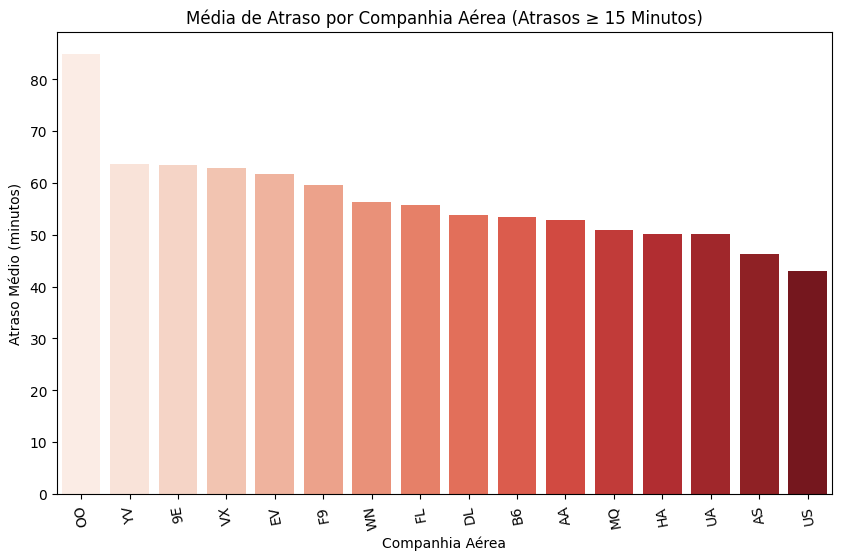

In [60]:
df_media_atraso = df_atraso.groupby('carrier')\
    ['arr_delay'].mean()\
    .sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=df_media_atraso.index, y=df_media_atraso.values, palette='Reds')
plt.title('Média de Atraso por Companhia Aérea (Atrasos ≥ 15 Minutos)')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=100)
plt.show()

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\233875011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_c_atraso.index, y=df_c_atraso.values, palette='Reds')


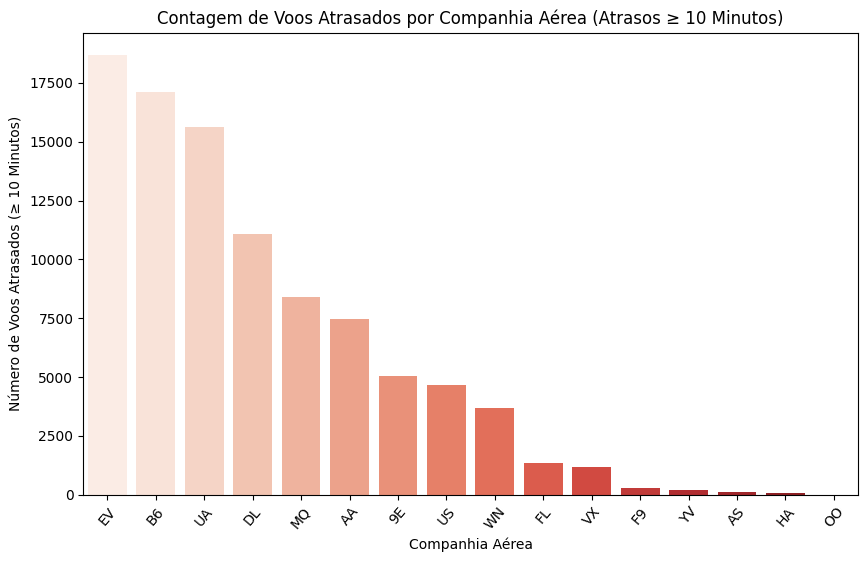

In [61]:
df_c_atraso = df_atraso.groupby('carrier')\
    ['arr_delay'].count()\
    .sort_values(ascending=False)
    
    
plt.figure(figsize=(10, 6))
sns.barplot(x=df_c_atraso.index, y=df_c_atraso.values, palette='Reds')
plt.title('Contagem de Voos Atrasados por Companhia Aérea (Atrasos ≥ 10 Minutos)')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos Atrasados (≥ 10 Minutos)')
plt.xticks(rotation=50)
plt.show()

** Quantitativamente: 

As top 4 companhia aérea listadas com atrasos maiores ou iguais a 10 minutos são: EV, B6, UA, e DL.

**Qualitativamente:

Dentre os atrasos listados no gráfico 01, temos a companhia aérea "OO" com atraso exorbitante acima dos 1 h e 20 minutos, as companhias "YV, 9E, VX, EV e F9" vem com um atraso parecidos em torno de 1 h.



#### 2. A rota ou aeronave podem influenciar nos atrasos?

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\349404152.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route', y='arr_delay', data=df_rotas_atraso, palette='Reds')


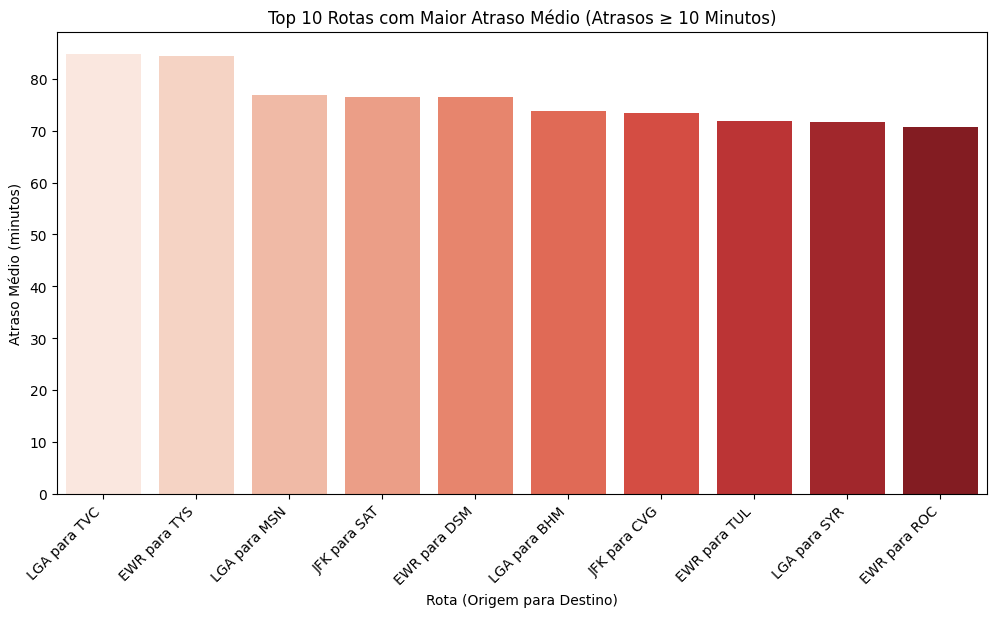

In [87]:
# 1. Analisando atrasos por rota (origem -> destino)
df_org_det = df_atraso.groupby(['origin', 'dest'])['arr_delay'].mean().sort_values(ascending=False)

# Top 10 rotas com maior atraso médio
df_rotas_atraso = df_org_det.head(10)

# Convertendo o índice MultiIndex para strings para facilitar a visualização
df_rotas_atraso = df_rotas_atraso.reset_index()  # Converte o índice composto em colunas
df_rotas_atraso['route'] = df_rotas_atraso['origin'] + ' para ' + df_rotas_atraso['dest']

plt.figure(figsize=(12, 6))
sns.barplot(x='route', y='arr_delay', data=df_rotas_atraso, palette='Reds')
plt.title('Top 10 Rotas com Maior Atraso Médio (Atrasos ≥ 10 Minutos)')
plt.xlabel('Rota (Origem para Destino)')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45, ha='right')
plt.show()



In [94]:
df_org_det = df_atraso.groupby(['origin', 'dest'])['arr_delay'].count().sort_values(ascending=False)

# Top 10 rotas com maior atraso médio
df_rotas_atraso = df_org_det.head(10)

# Convertendo o índice MultiIndex para strings para facilitar a visualização
df_rotas_atraso = df_rotas_atraso.reset_index()  # Converte o índice composto em colunas
df_rotas_atraso['route'] = df_rotas_atraso['origin'] + ' para ' + df_rotas_atraso['dest']

plt.figure(figsize=(12, 6))
sns.scatter(x, y, label='pontos', color='black', marker='o')
# sns.barplot(x='route', y='arr_delay', data=df_rotas_atraso, palette='Reds')
plt.title('Top 10 Rotas com Maior Atraso Médio (Atrasos ≥ 10 Minutos)')
plt.xlabel('Rota (Origem para Destino)')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45, ha='right')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatter'

<Figure size 1200x600 with 0 Axes>

#### 3. Existe algum padrão ou tendência nos atrasos ? Se sim, o que pode ser feito para reduzi-los?